#### Imports

In [ ]:
!pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 53.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successful

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf
from PIL import Image
import glob
import random
import pandas as pd

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier

#### Import the Data

In [ ]:
!unzip -q /content/hotdog-nothotdog.zip

replace __MACOSX/._hotdog-nothotdog? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hotdog-nothotdog/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/hotdog-nothotdog/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/hotdog-nothotdog/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/hotdog-nothotdog/._train? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/hotdog-nothotdog/test/._nothotdog? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/hotdog-nothotdog/test/._hotdog? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Image generator step comes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
files=glob.glob("/content/hotdog-nothotdog/train/hotdog/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob("/content/hotdog-nothotdog/train/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [ ]:
files=glob.glob("/content/hotdog-nothotdog/test/hotdog/*.jpg")
TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob("/content/hotdog-nothotdog/test/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


#### Check Dimensions of the Data

In [ ]:
print("TrainData ",len(TrainData))
print("TestData ",len(TestData))

TrainData  3000
TestData  644


#### Modeling

Train-Test-Split


In [ ]:
X_train = np.array([item[0] for item in TrainData])
y_train = np.array([item[1] for item in TrainData])

X_test = np.array([item[0] for item in TestData])
y_test = np.array([item[1] for item in TestData])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### Convolutional Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(128,128,3)),
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(
  monitor='val_loss',
  patience=5,
  verbose=1,
  restore_best_weights=True
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs = 10, batch_size = 20,
                    callbacks=[early_stop]
)

Epoch 1/10
150/150 [==============================] - 11s 64ms/step - loss: 0.6928 - accuracy: 0.5297 - val_loss: 0.6799 - val_accuracy: 0.5668
Epoch 2/10
150/150 [==============================] - 9s 59ms/step - loss: 0.6574 - accuracy: 0.6193 - val_loss: 0.6398 - val_accuracy: 0.6553
Epoch 3/10
150/150 [==============================] - 9s 59ms/step - loss: 0.6267 - accuracy: 0.6520 - val_loss: 0.6426 - val_accuracy: 0.6304
Epoch 4/10
150/150 [==============================] - 9s 61ms/step - loss: 0.6058 - accuracy: 0.6667 - val_loss: 0.6463 - val_accuracy: 0.6568
Epoch 5/10
150/150 [==============================] - 9s 60ms/step - loss: 0.5964 - accuracy: 0.6940 - val_loss: 0.5995 - val_accuracy: 0.6724
Epoch 6/10
150/150 [==============================] - 9s 60ms/step - loss: 0.5734 - accuracy: 0.7073 - val_loss: 0.5758 - val_accuracy: 0.6879
Epoch 7/10
150/150 [==============================] - 9s 57ms/step - loss: 0.5673 - accuracy: 0.7143 - val_loss: 0.5979 - val_accuracy: 0.695

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


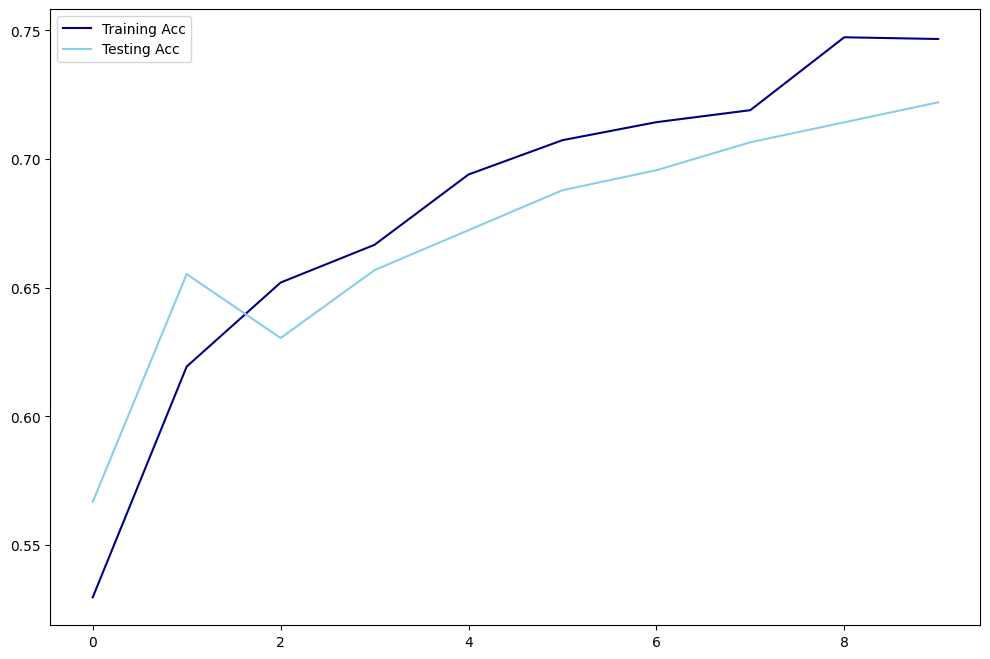

In [ ]:
# Visualize the Acc
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Acc', color='navy')
plt.plot(test_acc, label='Testing Acc', color='skyblue')
plt.legend();

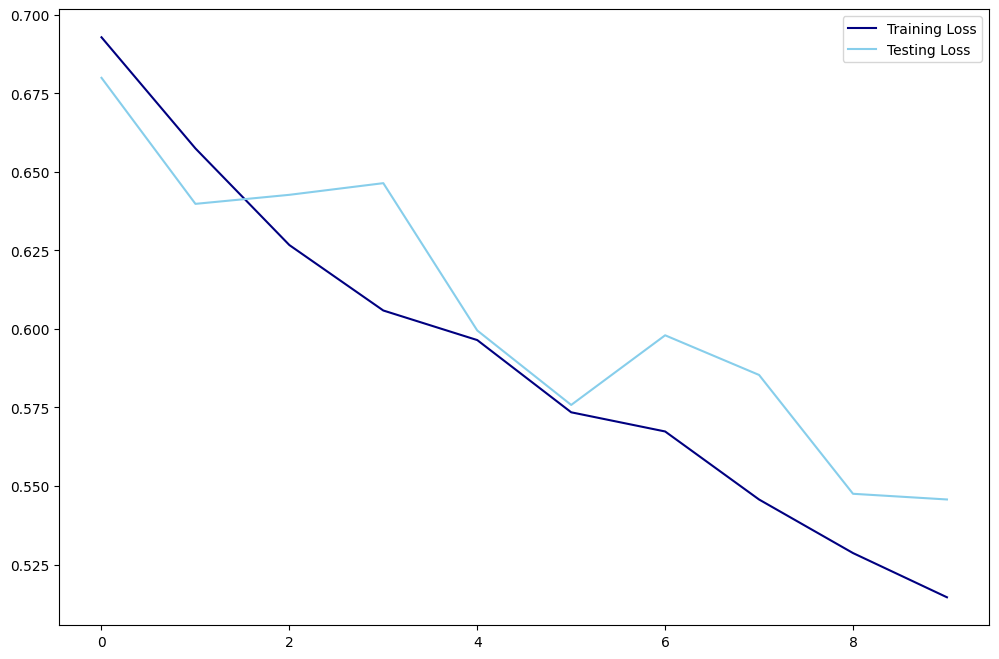

In [ ]:
# Visualize the Loss
train_acc = history.history['loss']
test_acc = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='Training Loss', color='navy')
plt.plot(test_acc, label='Testing Loss', color='skyblue')
plt.legend();

In [ ]:
#model.save("my_model.hdf5")
model.save("my_model.keras")

In [ ]:
model.save("my_model.h5")

In [ ]:
def model_func(layer_1_neurons, layer_1_drop, layer_2_neurons, layer_2_drop, layer_3_neurons, layer_3_drop, layer_4_neurons, layer_4_drop):

  model = Sequential()
  model.add(AveragePooling2D((2,2),2,input_shape=(128,128,3)))
  #model.add(Input((128,128,3)))

  model.add(Conv2D(layer_1_neurons,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(layer_1_drop))

  model.add(Conv2D(layer_2_neurons,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(layer_2_drop))

  model.add(Conv2D(layer_3_neurons,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(layer_3_drop))

  model.add(Flatten())
  model.add(Dense(layer_4_neurons,activation='relu'))
  model.add(Dropout((layer_4_drop)))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

  early_stop = EarlyStopping(
  monitor='val_loss',
  patience=5,
  verbose=1,
  restore_best_weights=True
)

  return model

In [ ]:
nn = KerasClassifier(model=model_func, batch_size=20, epochs = 20,
                     layer_1_neurons = 32, layer_1_drop = 0.2,
                     layer_2_neurons = 32, layer_2_drop = 0.2,
                     layer_3_neurons = 64, layer_3_drop = 0.2,
                     layer_4_neurons = 128, layer_4_drop = 0.2)




In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(128,128,3)),
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    # keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    # keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(
  monitor='val_loss',
  patience=5,
  verbose=1,
  restore_best_weights=True
)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
epochs = 100, batch_size = 20,
                    callbacks=[early_stop]
)

Epoch 1/10
150/150 [==============================] - 20s 123ms/step - loss: 0.6789 - accuracy: 0.5567 - val_loss: 0.6582 - val_accuracy: 0.6227
Epoch 2/10
150/150 [==============================] - 17s 113ms/step - loss: 0.6414 - accuracy: 0.6397 - val_loss: 0.6371 - val_accuracy: 0.6429
Epoch 3/10
150/150 [==============================] - 18s 119ms/step - loss: 0.6210 - accuracy: 0.6560 - val_loss: 0.6323 - val_accuracy: 0.6506
Epoch 4/10
150/150 [==============================] - 17s 113ms/step - loss: 0.5839 - accuracy: 0.6923 - val_loss: 0.6037 - val_accuracy: 0.6646
Epoch 5/10
150/150 [==============================] - 17s 115ms/step - loss: 0.5678 - accuracy: 0.7183 - val_loss: 0.5944 - val_accuracy: 0.6941
Epoch 6/10
150/150 [==============================] - 18s 117ms/step - loss: 0.5626 - accuracy: 0.7183 - val_loss: 0.6013 - val_accuracy: 0.7065
Epoch 7/10
150/150 [==============================] - 17s 114ms/step - loss: 0.5419 - accuracy: 0.7287 - val_loss: 0.5511 - val_ac

In [ ]:
param_grid = {
    'layer_1_neurons': [32],
    'layer_2_neurons': [32],
    'layer_3_neurons': [32, 64],
    'layer_4_neurons': [32, 64, 128],
    'layer_1_drop': [0.2],
    'layer_2_drop': [0.2],
    'layer_3_drop': [0.2, 0.35],
    'layer_4_drop': [0.2, 0.35],
}

gs = GridSearchCV(nn, param_grid = param_grid, cv=3, verbose = 1)

gs.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [early_stop])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Epoch 1/20
100/100 [==============================] - 14s 131ms/step - loss: 0.6957 - accuracy: 0.5055 - val_loss: 0.6857 - val_accuracy: 0.5978
Epoch 2/20
100/100 [==============================] - 12s 115ms/step - loss: 0.6622 - accuracy: 0.6035 - val_loss: 0.6418 - val_accuracy: 0.6335
Epoch 3/20
100/100 [==============================] - 12s 117ms/step - loss: 0.6357 - accuracy: 0.6400 - val_loss: 0.6310 - val_accuracy: 0.6320
Epoch 4/20
100/100 [==============================] - 11s 115ms/step - loss: 0.6400 - accuracy: 0.6210 - val_loss: 0.6371 - val_accuracy: 0.6460
Epoch 5/20
100/100 [==============================] - 11s 113ms/step - loss: 0.6185 - accuracy: 0.6530 - val_loss: 0.6408 - val_accuracy: 0.6475
Epoch 6/20
100/100 [==============================] - 12s 121ms/step - loss: 0.6053 - accuracy: 0.6695 - val_loss: 0.6111 - val_accuracy: 0.6739
Epoch 7/20
100/100 [==============================] - 11s 114ms/step 